In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler




In [2]:
# Load dataset
DATA_PATH = "machine_failure_dataset.csv"

# Function to load and preprocess data
def load_and_preprocess_data():
    df = pd.read_csv(DATA_PATH)

    # Display first few rows
    print("🔍 Data Preview:")
    display(df.head())

    # Handle missing values
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Normalize sensor readings
    scaler = MinMaxScaler()
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # One-hot encode Machine Type
    machine_types = ["Drill", "Mill", "Lathe"]
    df = pd.get_dummies(df, columns=["Machine_Type"], drop_first=False)

    # Ensure all machine types exist after encoding
    for m in machine_types:
        col_name = f"Machine_Type_{m}"
        if col_name not in df.columns:
            df[col_name] = 0  # Add missing columns if not present
    
    return df

# Load and preprocess data
df = load_and_preprocess_data()

# Display dataset shape
print(f"✅ Dataset Shape: {df.shape}")


🔍 Data Preview:


,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


✅ Dataset Shape: (1000, 8)


In [3]:
# Function to classify failure risk
def classify_failure_risk(df):
    df["Failure_Status"] = df["Failure_Risk"].map({0: "No Failure", 1: "Failure Risk"})
    return df

# Apply failure risk classification
df = classify_failure_risk(df)

# Display first few rows after classification
print("🔍 Data after Failure Risk Classification:")
display(df.head())


🔍 Data after Failure Risk Classification:


,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Drill,Machine_Type_Lathe,Machine_Type_Mill,Failure_Status
0,0.526922,0.707548,0.337521,0.165514,1.0,False,False,True,Failure Risk
1,0.437412,0.630150,0.413921,0.335204,0.0,False,True,False,No Failure
2,0.548204,0.489121,0.320641,0.407586,1.0,True,False,False,Failure Risk
3,0.671595,0.373922,0.390390,0.780414,1.0,False,True,False,Failure Risk
4,0.423895,0.593236,0.162099,0.564760,1.0,True,False,False,Failure Risk


In [4]:
from sklearn.ensemble import IsolationForest

# Function to detect anomalies using Isolation Forest
def detect_anomalies(df, feature_columns):
    model = IsolationForest(contamination=0.05, random_state=42)
    df["Anomaly"] = model.fit_predict(df[feature_columns])
    df["Anomaly"] = df["Anomaly"].map({1: "Normal", -1: "Anomaly"})
    return df

# Apply anomaly detection
df = detect_anomalies(df, ["Temperature", "Vibration", "Power_Usage", "Humidity"])

# Display the first few rows after anomaly detection
print("🔍 Data after Anomaly Detection:")
display(df.head())


🔍 Data after Anomaly Detection:


,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Drill,Machine_Type_Lathe,Machine_Type_Mill,Failure_Status,Anomaly
0,0.526922,0.707548,0.337521,0.165514,1.0,False,False,True,Failure Risk,Normal
1,0.437412,0.630150,0.413921,0.335204,0.0,False,True,False,No Failure,Normal
2,0.548204,0.489121,0.320641,0.407586,1.0,True,False,False,Failure Risk,Normal
3,0.671595,0.373922,0.390390,0.780414,1.0,False,True,False,Failure Risk,Normal
4,0.423895,0.593236,0.162099,0.564760,1.0,True,False,False,Failure Risk,Normal


C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


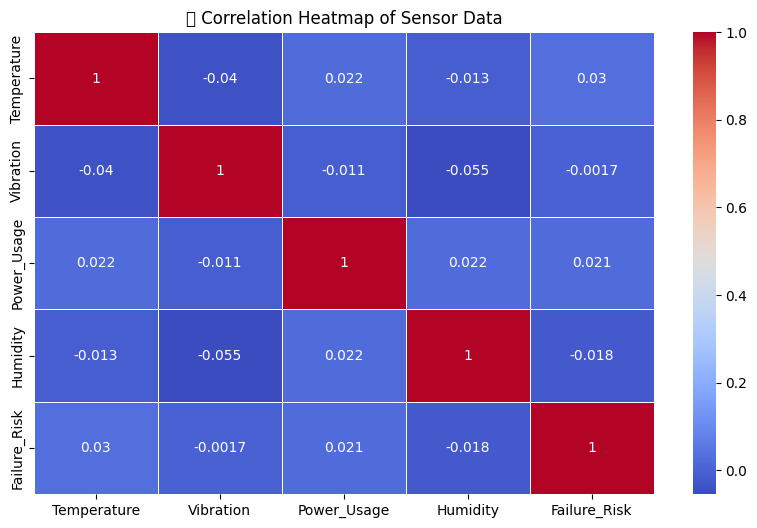

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and display a correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Correlation Heatmap of Sensor Data")
plt.show()


In [6]:
from sklearn.ensemble import IsolationForest

# Detect anomalies using Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly"] = model.fit_predict(df[["Temperature", "Vibration", "Power_Usage", "Humidity"]])
df["Anomaly"] = df["Anomaly"].map({1: "Normal", -1: "Anomaly"})

# Display anomaly counts
print("Anomaly Count:\n", df["Anomaly"].value_counts())

# Visualizing anomalies
import plotly.express as px
fig = px.scatter(df, x=df.index, y="Temperature", color="Anomaly", title="Anomalies in Temperature Readings")
fig.show()


Anomaly Count:
 Anomaly
Normal     950
Anomaly     50
Name: count, dtype: int64


In [7]:
import ipywidgets as widgets
from IPython.display import display

# Sidebar Widgets for user input
print("📊 Select Data Type:")
data_type_dropdown = widgets.Dropdown(
    options=df.columns[1:],
    description='Data:',
    disabled=False,
)
display(data_type_dropdown)

print("📊 Choose Chart Type:")
chart_type_dropdown = widgets.Dropdown(
    options=["Line Chart", "Bar Chart", "Scatter Plot", "Pie Chart"],
    description='Chart:',
    disabled=False,
)
display(chart_type_dropdown)

print("🔍 Select Anomaly Detection Method:")
model_type_dropdown = widgets.Dropdown(
    options=["Isolation Forest", "Logistic Regression", "Random Forest"],
    description='Model:',
    disabled=False,
)
display(model_type_dropdown)

print("⚙ Select Machine Type for Anomalies:")
machine_type_dropdown = widgets.Dropdown(
    options=["Drill", "Mill", "Lathe"],
    description='Machine:',
    disabled=False,
)
display(machine_type_dropdown)


📊 Select Data Type:


Dropdown(description='Data:', options=('Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk', 'Machine_Type_D…

📊 Choose Chart Type:


Dropdown(description='Chart:', options=('Line Chart', 'Bar Chart', 'Scatter Plot', 'Pie Chart'), value='Line C…

🔍 Select Anomaly Detection Method:


Dropdown(description='Model:', options=('Isolation Forest', 'Logistic Regression', 'Random Forest'), value='Is…

⚙ Select Machine Type for Anomalies:


Dropdown(description='Machine:', options=('Drill', 'Mill', 'Lathe'), value='Drill')

In [8]:
# Filter dataset based on selected machine type
selected_machine_type = machine_type_dropdown.value

if f"Machine_Type_{selected_machine_type}" in df.columns:
    filtered_df = df[df[f"Machine_Type_{selected_machine_type}"] == 1]
else:
    print(f"⚠ No data available for {selected_machine_type}")
    filtered_df = pd.DataFrame()

# Display filtered data
print(f"✅ Data for {selected_machine_type}:")
display(filtered_df.head())


✅ Data for Mill:


,Temperature,Vibration,Power_Usage,Humidity,Failure_Risk,Machine_Type_Drill,Machine_Type_Lathe,Machine_Type_Mill,Failure_Status,Anomaly
0,0.526922,0.707548,0.337521,0.165514,1.0,False,False,True,Failure Risk,Normal
7,0.565084,0.582956,0.317089,0.223918,1.0,False,False,True,Failure Risk,Normal
9,0.533384,0.392134,0.569713,0.398268,1.0,False,False,True,Failure Risk,Normal
13,0.187199,0.367034,0.299407,0.248250,1.0,False,False,True,Failure Risk,Normal
21,0.425076,0.385863,0.474663,0.399558,1.0,False,False,True,Failure Risk,Normal


In [10]:
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown for feature selection
feature_options = df.columns[1:]  # Exclude the index column
selected_feature_dropdown = widgets.Dropdown(
    options=feature_options,
    description="Feature:",
    value=feature_options[0]  # Default to the first feature
)

# Display the dropdown
display(selected_feature_dropdown)


Dropdown(description='Feature:', options=('Vibration', 'Power_Usage', 'Humidity', 'Failure_Risk', 'Machine_Typ…

In [12]:
# Plot time series of the selected feature
fig = px.line(df, x=df.index, y=selected_feature_dropdown.value,
              title=f"{selected_feature_dropdown.value} Over Time")

fig.show()
